# UCLA GRADUATE ADMISSION PREDICTION 
### Author- Akshay Bhat

### Here we aim to predict the admission into UCLA by conducting wide variety of analysis and using different forecasting methods to find the best fit.

Source : Kaggle Data set <br>
Link- https://www.kaggle.com/mohansacharya/graduate-admissions/home
Citation-Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019
#### The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are :
- GRE Scores ( out of 340 )
- TOEFL Scores ( out of 120 )
- University Rating ( out of 5 )
- Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
- Undergraduate GPA ( out of 10 )
- Research Experience ( either 0 or 1 )
- Chance of Admit ( ranging from 0 to 1 )

#### Project workflow:
- Data preprocessing and cleaning
- Data Visualization
- Model selection and building
- Model prediction

In [1]:
# Importing Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from pandas.plotting import scatter_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

## PART 1- EXPLORATORY DATA ANALYSIS

In [2]:
# Importing the data

data=pd.read_csv('UCLA admission.csv')

In [3]:
#Length of the data(Returns number of rows)

print(len(data))

500


In [4]:
#Shape of the data(Returns number of rows and columns)

print(data.shape)

(500, 9)


In [5]:
#List the columns(Returns an object with all the column headers)

print(data.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


In [6]:
#Check the datatypes(Returns different datatypes associated with each column)

data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [7]:
# Analyzing the first 5 rows of the data set

data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
# Analyzing the last 5 rows of the data set

data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [9]:
# Random 5 rows in dataset

data.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
320,321,317,106,3,4.0,3.5,8.50,1,0.75
417,418,316,103,3,3.5,2.0,7.68,0,0.52
140,141,329,110,2,4.0,3.0,9.15,1,0.84
111,112,321,109,4,4.0,4.0,8.68,1,0.69
51,52,312,100,2,1.5,3.5,7.90,1,0.56


In [10]:
#Method 2 to predict random rows in terms of percentage.

data.sample(frac=.01)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
340,341,312,107,3,3.0,3.0,8.46,1,0.75
44,45,326,113,5,4.5,4.0,9.40,1,0.91
372,373,336,119,4,4.5,4.0,9.62,1,0.95
142,143,331,115,5,4.0,3.5,9.44,1,0.92
98,99,332,119,4,5.0,4.5,9.24,1,0.90


In [11]:
# Information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


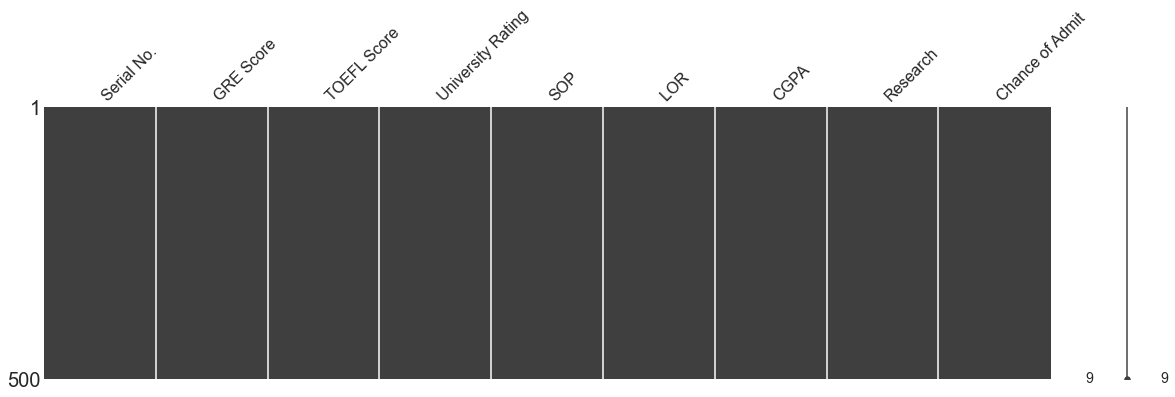

In [12]:
#Check for missing values in the dataset
#Dataset looks clean with no missing values

msno.matrix(data, figsize=(20,5))


In [13]:
#Method 2 to check missing values: 

data.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [14]:
#Method 3:

data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [15]:
#Check the statistical information 

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [16]:
#Check if the Serial No. has unique values.

len(data['Serial No.'].unique())

500

# PART 2- VISUALIZATION OF DATA

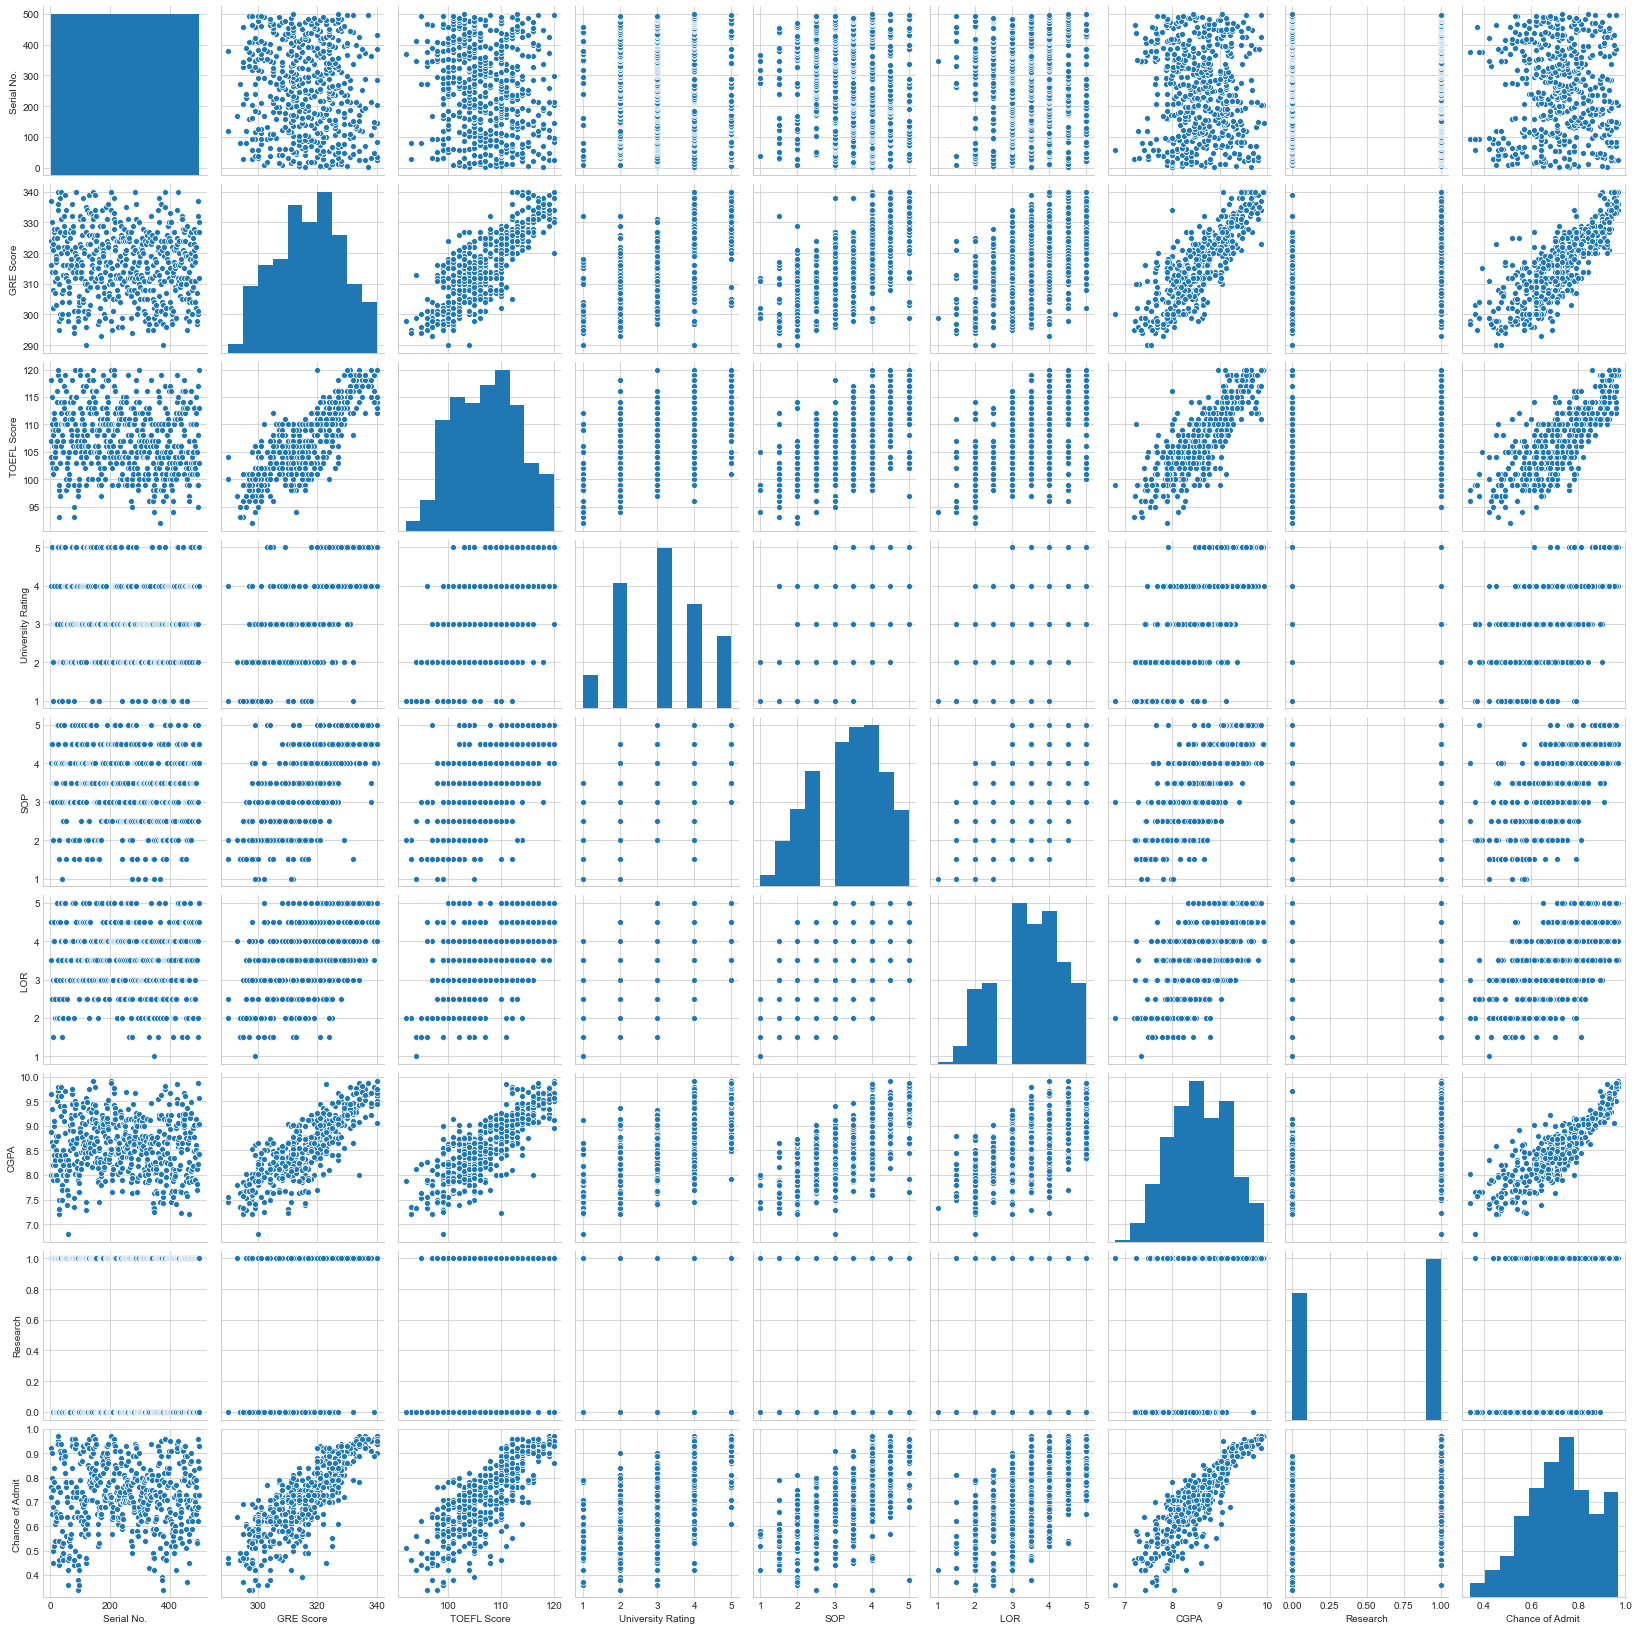

In [17]:
# Correlogram shows the relation between the features

sns.pairplot(data)
plt.show()

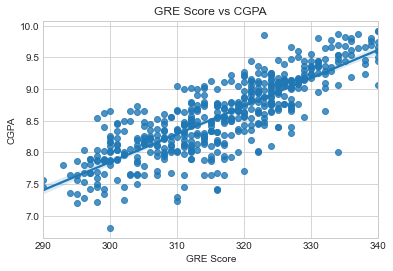

In [18]:
#Regression plot between GRE score and CGPA
fig = sns.regplot(x="GRE Score", y="CGPA", data=data)
plt.title("GRE Score vs CGPA")
plt.show()


### GRE SCORE ANALYSIS

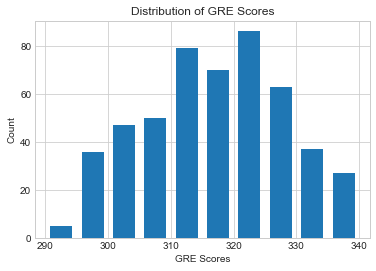

In [19]:
fig = plt.hist(data['GRE Score'], rwidth=0.7)
plt.title("Distribution of GRE Scores")
plt.xlabel('GRE Scores')
plt.ylabel('Count')
plt.show()

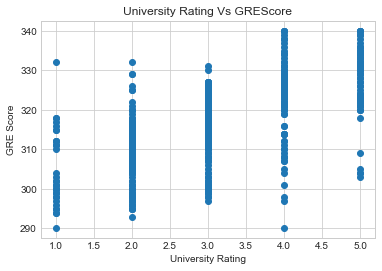

In [20]:
#University rating vs GRE Score

plt.scatter(x='University Rating',y='GRE Score',data=data)
plt.xlabel('University Rating')
plt.ylabel('GRE Score')
plt.title('University Rating Vs GREScore')
plt.show()


### TOEFL SCORE ANALYSIS

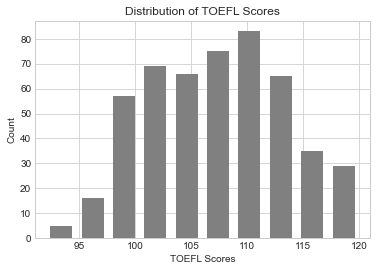

In [39]:
fig = plt.hist(data['TOEFL Score'], rwidth=0.7,color='grey')
plt.title('Distribution of TOEFL Scores')
plt.xlabel('TOEFL Scores')
plt.ylabel('Count')
plt.show()

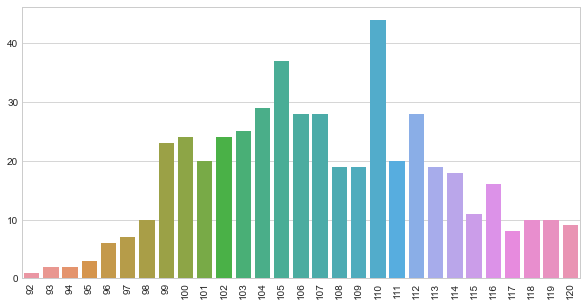

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(x=data['TOEFL Score'].value_counts().index,y=data['TOEFL Score'].value_counts().values)
plt.xticks(rotation=90)
plt.show()


### UNIVERSITY RATING ANALYSIS

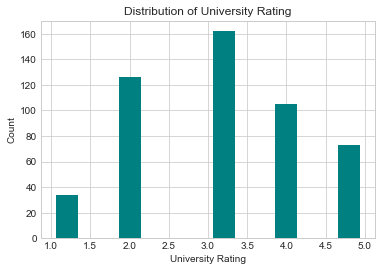

In [38]:
fig = plt.hist(data['University Rating'], rwidth=0.7,color='teal')
plt.title('Distribution of University Rating')
plt.xlabel('University Rating')
plt.ylabel('Count')
plt.show()

In [24]:
data['University Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

In [34]:
#In terms of percentage
data['University Rating'].value_counts(normalize=True)

3    0.324
2    0.252
4    0.210
5    0.146
1    0.068
Name: University Rating, dtype: float64

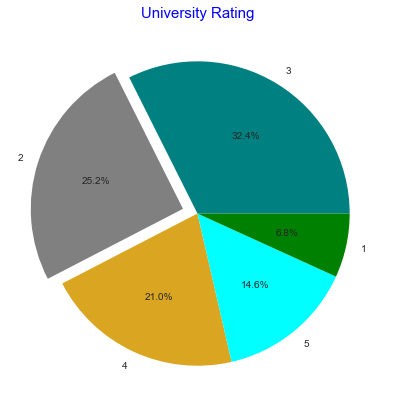

In [32]:
colors = ['teal','grey','goldenrod','cyan','green']
explode = [0,0.1,0,0,0]
plt.figure(figsize=(7,7))
plt.pie(data['University Rating'].value_counts().values,explode=explode,labels=data['University Rating'].value_counts().index,colors=colors,autopct='%1.1f%%')
plt.title('University Rating',color='blue',fontsize=15)
plt.show()

### SOP ANALYSIS

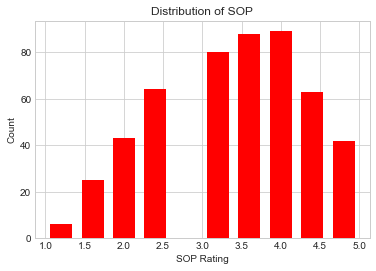

In [44]:
fig = plt.hist(data['SOP'], rwidth=0.7,color='red')
plt.title('Distribution of SOP')
plt.xlabel('SOP Rating')
plt.ylabel('Count')
plt.show()

### LOR ANALYSIS

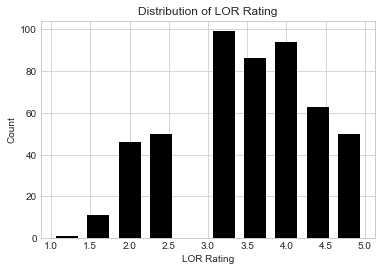

In [47]:
fig = plt.hist(data['LOR '], rwidth=0.7,color='black')
plt.title('Distribution of LOR Rating')
plt.xlabel('LOR Rating')
plt.ylabel('Count')
plt.show()

### CGPA ANALYSIS

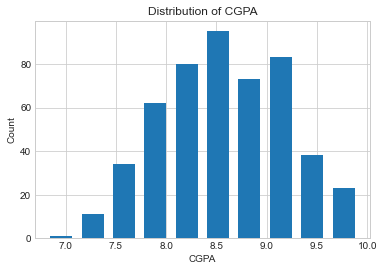

In [48]:
fig = plt.hist(data['CGPA'], rwidth=0.7)
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.show()

### RESEARCH ANALYSIS

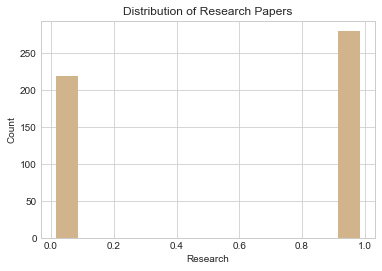

In [55]:
fig = plt.hist(data['Research'], rwidth=0.7,color='tan')
plt.title('Distribution of Research Papers')
plt.xlabel('Research')
plt.ylabel('Count')
plt.show()


### Chance of Admit Analysis

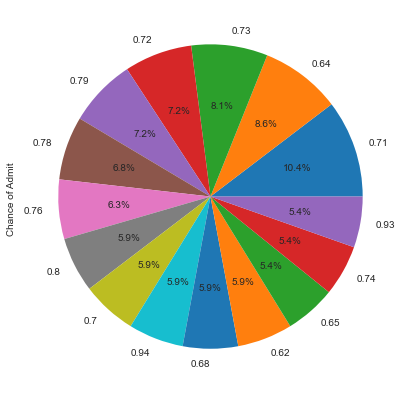

In [59]:
plt.figure( figsize=(7,7))
data['Chance of Admit '].value_counts().head(15).plot.pie(autopct="%1.1f%%")
plt.show()

#### As the data is perfect there is no need of cleaning

# PART 3- MODEL SELECTION AND BUILDING

In [92]:
#Separating our features from the Chance of admit.

X = data1.drop('Chance of Admit ', axis='columns')
y = data1['Chance of Admit ']

In [93]:
# Selecting the best model using GridSearchCV 
# Here the estimator exposes a score method that can judge the quality of the fit (or the prediction) on new data.
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


In [94]:
# Creating  a function to select the best model
def find_best_model(X, y):
    models = {
        'linear_regression': {
            'model': LinearRegression(),
            'parameters': {
                'normalize': [True,False]
            }
        },
        
        'lasso': {
            'model': Lasso(),
            'parameters': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        
        'svr': {
            'model': SVR(),
            'parameters': {
                'gamma': ['auto','scale']
            }
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'parameters': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        },
        
        'random_forest': {
            'model': RandomForestRegressor(criterion='mse'),
            'parameters': {
                'n_estimators': [5,10,15,20]
            }
        },
        
        'knn': {
            'model': KNeighborsRegressor(algorithm='auto'),
            'parameters': {
                'n_neighbors': [2,5,10,20]
            }
        }
    }
    
    scores = []
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=5, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])
        
find_best_model(X, y)

,model,best_parameters,score
0,linear_regression,{'normalize': True},0.810802
1,lasso,"{'alpha': 1, 'selection': 'random'}",0.215088
2,svr,{'gamma': 'scale'},0.654099
3,decision_tree,"{'criterion': 'mse', 'splitter': 'best'}",0.574775
4,random_forest,{'n_estimators': 20},0.773821
5,knn,{'n_neighbors': 20},0.722961


#### Linear Regression stands out with an accuracy of 81%.

In [95]:
# Splitting the dataset into 80% train and 20% test samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)
print(len(X_train), len(X_test))

400 100


### Building the Linear regression model

In [96]:
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.821478736588966

# PART 4- MODEL PREDICTION

In [97]:
# Example-Prediction 1
# Input sequence: GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research

print('Chance of getting admitted is {}%'.format(round(model.predict([[315, 101, 4, 4.5, 4, 9, 0]])[0]*100, 3)))


Chance of getting admitted is 75.438%


In [ ]:
# Example-Prediction 1
# Input sequence: GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research

print('Chance of getting admitted is {}%'.format(round(model.predict([[325, 112, 4, 4.5, 4, 9.5, 0]])[0]*100, 3)))
